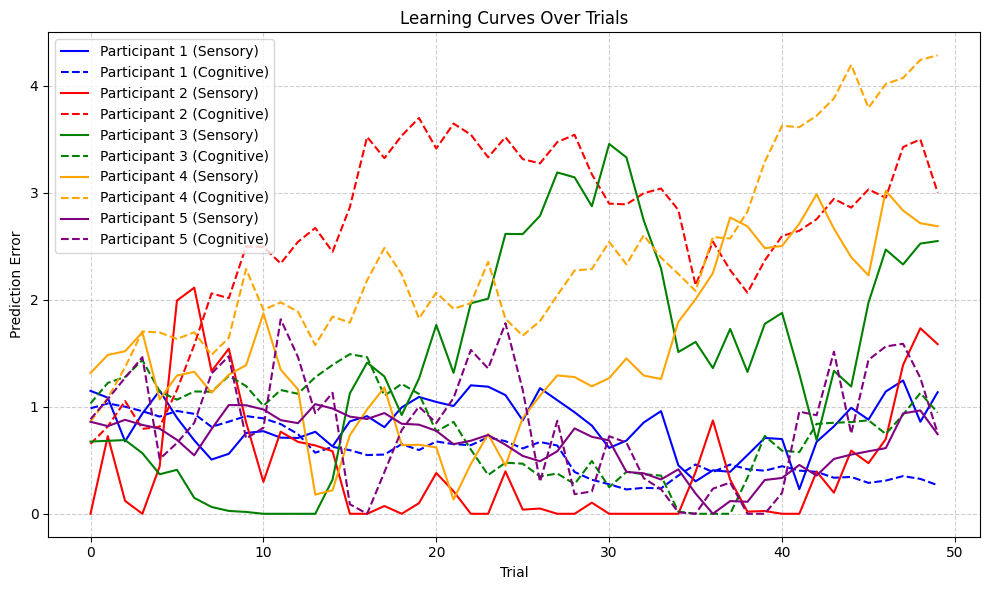

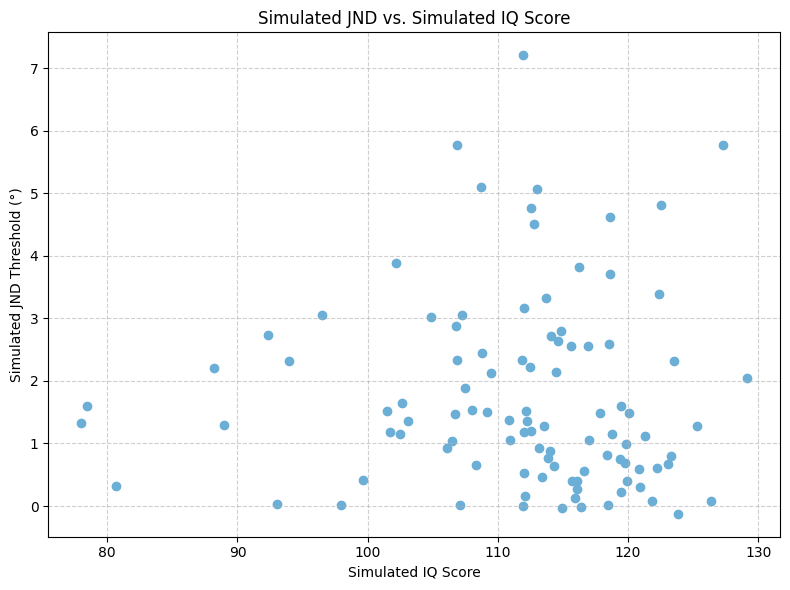

correlation between simulated iq and jnd: r = -0.008, p = 0.9344


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# set random seed for reproducibility
np.random.seed(42)

# define number of participants and trials
n_participants = 100
n_trials = 50

# assign random precision values
sensory_precision = np.random.uniform(0.5, 5.0, size=n_participants)
cognitive_precision = np.random.uniform(0.5, 5.0, size=n_participants)

# create arrays to hold prediction errors
sensory_errors = np.zeros((n_participants, n_trials))
cognitive_errors = np.zeros((n_participants, n_trials))

# simulate learning across trials
for i in range(n_participants):
    sensory_error = 1.0  # start with high error
    cognitive_error = 1.0  # start with high error
    for t in range(n_trials):
        # sensory layer updates
        sensory_update = sensory_precision[i] * np.random.normal(0, 0.1)
        sensory_error = sensory_error - sensory_update
        sensory_error = max(sensory_error, 0) # prediction error logically cannot be negative. this just steers it on course
        sensory_errors[i, t] = sensory_error

        # cognitive layer updates
        cognitive_update = cognitive_precision[i] * np.random.normal(0, 0.1)
        cognitive_error = cognitive_error - cognitive_update
        cognitive_error = max(cognitive_error, 0)
        cognitive_errors[i, t] = cognitive_error

# calculate final measures
final_sensory_error = sensory_errors[:, -1]
final_cognitive_error = cognitive_errors[:, -1]

# simulate jnd scores
jnd_simulated = final_sensory_error + np.random.normal(0, 0.05, size=n_participants)

# ai is not always a good solution for debugging help. i rescaled the cognitive errors FIRST here
cog_error_scaled = (final_cognitive_error - np.min(final_cognitive_error)) / (np.max(final_cognitive_error) - np.min(final_cognitive_error))

# simulate iq scores with our newfound silver bullet
iq_simulated = 120 - (cog_error_scaled * 40) + np.random.normal(0, 5, size=n_participants)

# define colors for participants bc otherwise it'll be a mess by default
colors = ['blue', 'red', 'green', 'orange', 'purple']

# plot learning curves for first 5 participants with consistent coloring
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(range(n_trials), sensory_errors[i], label=f'Participant {i+1} (Sensory)', color=colors[i], linestyle='-')
    plt.plot(range(n_trials), cognitive_errors[i], label=f'Participant {i+1} (Cognitive)', color=colors[i], linestyle='--')
plt.title('Learning Curves Over Trials')
plt.xlabel('Trial')
plt.ylabel('Prediction Error')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# scatterplot of simulated iq vs jnd
plt.figure(figsize=(8, 6))
plt.scatter(iq_simulated, jnd_simulated, color='#6BAED6')
plt.title('Simulated JND vs. Simulated IQ Score')
plt.xlabel('Simulated IQ Score')
plt.ylabel('Simulated JND Threshold (°)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

r, p = pearsonr(iq_simulated, jnd_simulated)
print(f'correlation between simulated iq and jnd: r = {r:.3f}, p = {p:.4f}')
